# purpose of this note
- We already have some summary statistics about SNPs on mapped fragements
- This note visualize that information
- We assume that we have a table file of following fields:
  - name of the mapped fragments
  - total # of mismatches in the read
  - total # of mismatches that has a hit on dbSNP by its position
  - total # of mismatches that has the same entry on dbSNP
- we create three histograms on the table

In [1]:
%matplotlib inline
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/ytanigaw/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# prepare stats data

In [2]:
!mkdir -p ${SCRATCH}/tmp/${SLURM_JOB_ID}

In [3]:
!cat /share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q14.snps \
| awk 'BEGIN{OFS = "\t"} {print $1, $2, $3, $4}' \
| sed -e 's/_Basecall_Alignment_template//g' \
> ${SCRATCH}/tmp/${SLURM_JOB_ID}/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q14.snps.count

In [4]:
!echo ${SCRATCH}/tmp/${SLURM_JOB_ID}/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q14.snps.count

/scratch/users/ytanigaw/tmp/11350762/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q14.snps.count


In [5]:
file_q14 = '/scratch/users/ytanigaw/tmp/11350762/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q14.snps.count'

In [6]:
!cat /share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q10.snps \
| awk 'BEGIN{OFS = "\t"} {print $1, $2, $3, $4}' \
| sed -e 's/_Basecall_Alignment_template//g' \
> ${SCRATCH}/tmp/${SLURM_JOB_ID}/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q10.snps.count

In [7]:
file_q10 = '/scratch/users/ytanigaw/tmp/11350762/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q10.snps.count'

In [39]:
def make_three_plots(df, title_tail = '', filename = None):
    '''
    This function generates histogram of a vector x and save to file
    Inputs:
      df:         data frame
      title_tail: title of the plot
      filename:   name of the image file (if given, save to file)
    Side effect:
      save an image file if filename is given
    '''    
    fig = plt.figure(figsize=(15,3))
    
    cols = list(df.columns)[1:]
    axs = [fig.add_subplot(1, len(cols), i + 1) for i in xrange(len(cols))]
    
    for ax, col in zip(axs, cols):        
        ax.set_xlabel(col)
        ax.set_ylabel('Freq.')
        ax.set_title('hist: {head} {tail}'.format(head = col, tail = title_tail))
        ax.hist(df[col], 50)
        
    if(filename is not None):
        fig.savefig(filename)
    
    return

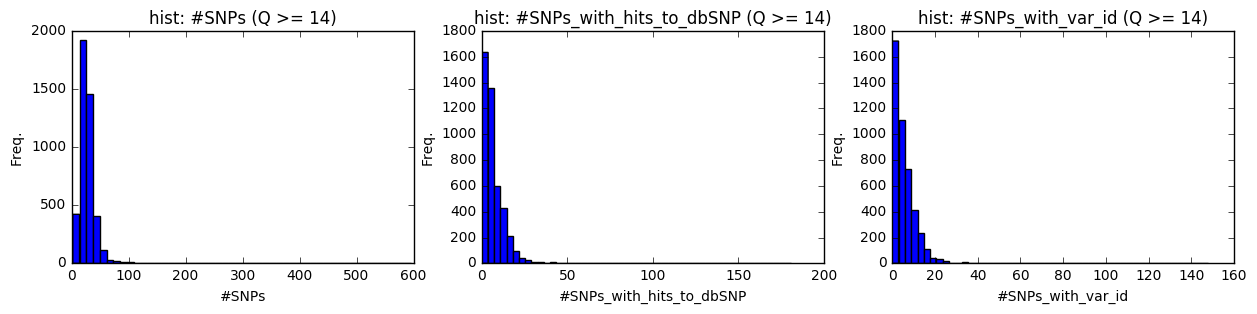

In [42]:
make_three_plots(df=pd.read_csv(file_q14, sep = '\t'), title_tail='(Q >= 14)', 
                 filename = '/scratch/users/ytanigaw/tmp/11350762/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q14.snps.png')

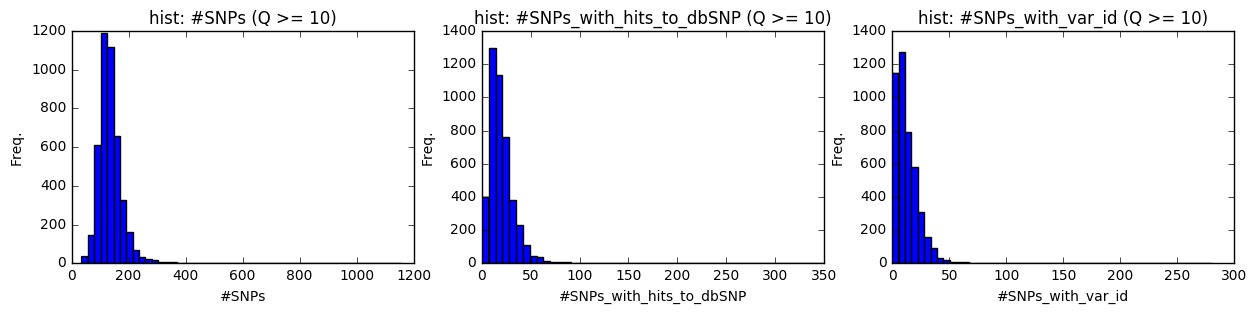

In [43]:
make_three_plots(df=pd.read_csv(file_q10, sep = '\t'), title_tail='(Q >= 10)', 
                 filename = '/scratch/users/ytanigaw/tmp/11350762/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q10.snps.png')

In [44]:
!ls ${SCRATCH}/tmp/${SLURM_JOB_ID}/*.png

/scratch/users/ytanigaw/tmp/11350762/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q10.snps.png
/scratch/users/ytanigaw/tmp/11350762/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.q14.snps.png


In [45]:
!cp ${SCRATCH}/tmp/${SLURM_JOB_ID}/*.png /share/PI/mrivas/data/nanopore-wgs-consortium/

In [46]:
!cp ${SCRATCH}/tmp/${SLURM_JOB_ID}/*.png /home/ytanigaw/projects/nanopore/scripts/20161218/